# Sprint 1: Data analysis and supervised learning

## Exploratory Data Analysis

Inlezen van het CSV bestand naar een DataFrame.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

rows_to_read = 10000 # Gewenst aantal rijen inlezen (None = allemaal)

complaints = pd.read_csv('data/complaints.csv', delimiter=',', nrows=rows_to_read)

rows, cols = complaints.shape

print(f'Er zijn {rows} rijen en {cols} kolommen')

Er zijn 10000 rijen en 18 kolommen


In [73]:
# Uitvoer inverteren voor betere leesbaarheid
complaints.head().T

,0,1,2,3,4
Date received,07/23/19,07/26/19,06/03/19,07/03/19,07/14/19
Product,"Credit reporting, credit repair services, or o...",Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub-issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Consumer complaint narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...
Company public response,Company has responded to the consumer and the ...,Company believes it acted appropriately as aut...,None,None,None
Company,Experian Information Solutions Inc.,"Ideal Collection Services, Inc.","ONEMAIN FINANCIAL HOLDINGS, LLC.","Diversified Consultants, Inc.","ClearOne Advantage, LLC"
State,CA,FL,FL,VA,PA
ZIP code,926XX,333XX,327XX,232XX,191XX


Om de data beter te begrijpen maken we een nieuwe DataFrame met slechts 3 kolommen.
- Product
- Sub-product
- Consumer complaint narrative

Met deze DataFrame gaan we het aantal klachten voor elke categorie van producten en sub-producten bepalen.

In [74]:
# Nieuwe DataFrame aanmaken met 3 kolommen
df = complaints[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']].copy()

# Kolommen een simpelere naam geven
df.columns = ['Product', 'Sub_Product', 'Issue', 'Sub_Issue', 'Narrative'] 

df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative
0,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...


### Aantal klachten per categorie van producten

In [75]:
print('Aantal product categorieën:', pd.DataFrame(complaints.Product.unique()).size)

Aantal product categorieën: 13


Er zijn meer dan 18 verschillende categorieën voor de producten. Sommige zijn echter heel erg gerelateerd aan elkaar. Daarom kan het nuttig zijn om sommige categorieën samen te nemen om de accuraatheid van het te bekomen model te verbeteren.
- 'Credit reporting, repair, or other'
    - 'Credit reporting, credit repair services, or other personal consumer reports'
    - 'Credit reporting'
- 'Credit card or prepaid card'
    - 'Credit card'
    - 'Prepaid card'
- 'Payday loan, title loan, or personal loan
    - 'Payday loan'
- 'Money transfer, virtual currency, or money service'
    - 'Money transfer' 
    - 'Virtual currency'

In [76]:
df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [77]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,"Payday loan, title loan, or personal loan"
3,Mortgage
4,Credit card or prepaid card
5,Checking or savings account
6,Student loan
7,Vehicle loan or lease
8,"Money transfer, virtual currency, or money ser..."
9,Bank account or service


Er blijven nu slechts 13 product categorieën over.

Om het mogelijk te maken om een model te ontwikkelen gaan we elke categorie die in tekstvorm in de dataset staat, gaan voorstellen als een getal. Hiervoor voegen we een nieuwe kolom toe met als naam 'Category_Id'.

In [78]:
df['Category_Id'] = df['Product'].factorize()[0]

# Dictionary aanmaken die de 'Category_Id - Product' combinaties bevat
categories = dict(df[['Category_Id', 'Product']].drop_duplicates().values)
categories

{0: 'Credit reporting, repair, or other',
 1: 'Debt collection',
 2: 'Payday loan, title loan, or personal loan',
 3: 'Mortgage',
 4: 'Credit card or prepaid card',
 5: 'Checking or savings account',
 6: 'Student loan',
 7: 'Vehicle loan or lease',
 8: 'Money transfer, virtual currency, or money service',
 9: 'Bank account or service'}

In [79]:
# Nieuwe DataFrame met de extra kolom weergeven
df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative,Category_Id
0,"Credit reporting, repair, or other",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,0
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,1
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,1
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,1
4,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,0


Vervolgens gaan we het aantal producten per categorie bepalen en visualiseren in een barplot.

In [80]:
# Aantal products
product_counts = pd.DataFrame({'Count': df.groupby(['Product']).size()})
product_counts

,Count
Product,
Bank account or service,3
Checking or savings account,576
Credit card or prepaid card,918
"Credit reporting, repair, or other",4693
Debt collection,2062
"Money transfer, virtual currency, or money service",235
Mortgage,786
"Payday loan, title loan, or personal loan",172
Student loan,318


<Figure size 720x360 with 0 Axes>

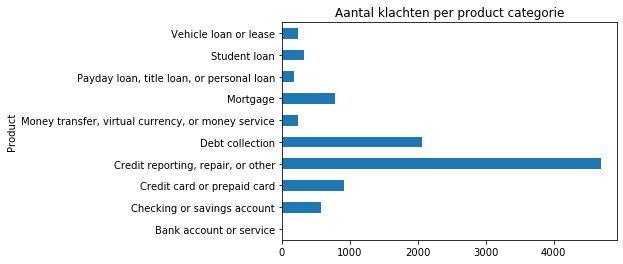

In [81]:
fig = plt.figure(figsize=(10, 5))
product_counts.plot.barh(title="Aantal klachten per product categorie", legend=None)

De verdeling van de data over de verschillende categorieën is niet gebalanceerd. Dit kan voor problemen zorgen bij het classificeren aangezien de kleine categorieën als uitschieters gezien kunnen worden. We zouden deze categorieën kunnen oversampelen zodat de dataset gebalanceerd wordt, maar aangezien de categorieën die het meest voorkomen ook het meest waarschijnlijk voorkomen tijdens het classificeren, zullen we dit niet doen.

Om deze categorieën van producten en sub-producten beter te begrijpen, gaan we het verband tussen beiden gaan onderzoeken.

In [82]:
sub_product_counts = pd.DataFrame({'Count': df.groupby(['Product', 'Sub_Product']).size()})
sub_product_counts

Count
Product                                            Sub_Product                                      
Bank account or service                            Checking account                                2
                                                   Other bank product/service                      1
Checking or savings account                        CD (Certificate of Deposit)                    10
                                                   Checking account                              466
                                                   Other banking product or service               45
                                                   Savings account                                55
Credit card or prepaid card                        General-purpose credit card or charge card    704
                                                   General-purpose prepaid card                   37
                                                   Gift card                                       3
                                                   Government benefit card                         9
                                                   None                                            4
                                                   Payroll card                                    5
                                                   Store credit card                             156
Credit reporting, repair, or other                 Credit repair services                         36
                                                   Credit reporting                             4586
                                                   None                                            1
                                                   Other personal consumer report                 70
Debt collection                                    Auto debt                                      60
                                                   Credit card debt                              492
                                                   Federal student loan debt                      30
                                                   I do not know                                 391
                                                   Medical                                         2
                                                   Medical debt                                  350
                                                   Mortgage debt                                  45
                                                   Other (i.e. phone, health club, etc.)           3
                                                   Other debt                                    582
                                                   Payday loan                                     1
                                                   Payday loan debt                               77
                                                   Private student loan debt                      29
Money transfer, virtual currency, or money service Check cashing service                           5
                                                   Debt settlement                                 7
                                                   Domestic (US) money transfer                   76
                                                   Foreign currency exchange                       2
                                                   International money transfer                   27
                                                   Mobile or digital wallet                       84
                                                   Money order                                     3
                                                   Refund anticipation check                       2
                                                   Traveler's check or cashier's check             2
                                                   Virt

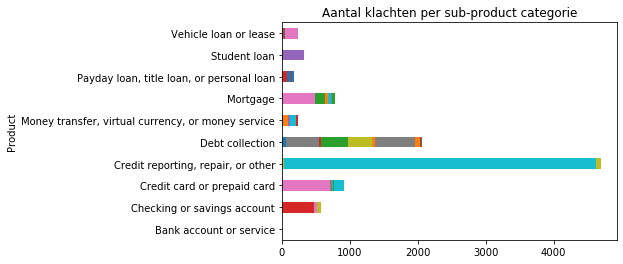

In [83]:
sub_product_counts.unstack().plot(kind='barh', stacked=True, legend=None, title="Aantal klachten per sub-product categorie")

## Data pre-processing

Om tekst als invoer te gebruiken voor algoritmes, moeten we deze gaan converteren naar bruikbare data. We berekenen hiervoor de Term Frequency en Inverse Document Frequency (TF-IDF).
- Term Frequency: beschrijft relatief hoeveel keer een gegeven woord in een document voorkomt ten opzichte van het totaal aantal woorden
- Inverse Document Frequency: beschrijft het aantal keer een bepaalde term voorkomt over meerdere documenten
    - Hoge IDF: term komt slechts voor in een paar documenten
    - Lage IDF: term komt in veel documenten voor

TfidfVectorizer class wordt geïnitialiseerd met de volgende paramters:
- `min_df`: verwijder de termen die in minder dan deze waarde aantal documenten voorkomt
- `sublinear_tf`: term frequentie op een logaritmische schaal plaatsen
- `stop_words`: verwijder specifieke (vaak voorkomende) stop woorden uit het Engels
- `ngram_range`: (1, 2) geeft aan dat zowel termen uit 1 woord (unigram), als termen die uit 2 woorden (bigram) bestaat kunnen gebruikt worden

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

features = tfidfVector.fit_transform(df['Narrative']).toarray()
labels = df.Category_Id

print("De %d verschillende klachten worden voorgeteld door %d features (TF-IDF score)" %(features.shape))

De 10000 verschillende klachten worden voorgeteld door 27254 features (TF-IDF score)


In [86]:
from sklearn.feature_selection import chi2

N = 3
for Category_Id, Product in sorted(categories.items()):
  features_chi2 = chi2(features, labels == Category_Id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidfVector.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Meest gecorreleerde unigrams zijn: %s" %(', '.join(unigrams[-N:])))
  print("  * Meest gecorreleerde bigrams zijn: %s" %(', '.join(bigrams[-N:])))


==> Credit reporting, repair, or other:
  * Meest gecorreleerde unigrams zijn: equifax, reporting, report
  * Meest gecorreleerde bigrams zijn: credit file, identity theft, credit report

==> Debt collection:
  * Meest gecorreleerde unigrams zijn: collect, collection, debt
  * Meest gecorreleerde bigrams zijn: trying collect, collection agency, collect debt

==> Payday loan, title loan, or personal loan:
  * Meest gecorreleerde unigrams zijn: tower, borrowed, loan
  * Meest gecorreleerde bigrams zijn: pay loan, 00 loan, title loan

==> Mortgage:
  * Meest gecorreleerde unigrams zijn: foreclosure, escrow, mortgage
  * Meest gecorreleerde bigrams zijn: loan modification, mortgage company, escrow account

==> Credit card or prepaid card:
  * Meest gecorreleerde unigrams zijn: citi, express, card
  * Meest gecorreleerde bigrams zijn: new card, american express, credit card

==> Checking or savings account:
  * Meest gecorreleerde unigrams zijn: savings, branch, deposit
  * Meest gecorrele

## Classification Experiments: Multi-Class Text Classification

Multi-Classification models die we zullen evalueren:
- Random Forest
- Linear Support Vector Machine
- Multinomial Naive Bayes
- Logistic Regression